In [2]:
from cmdstanpy import CmdStanModel
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import json
from one_popn_number import popn1_data

In [3]:
dist_model = CmdStanModel(stan_file='one_popn_dist_model.stan')

11:50:10 - cmdstanpy - INFO - compiling stan file /Users/qichen/Desktop/genetics/code/admix_stan/one_popn_dist/one_popn_dist_model.stan to exe file /Users/qichen/Desktop/genetics/code/admix_stan/one_popn_dist/one_popn_dist_model
11:50:19 - cmdstanpy - INFO - compiled model executable: /Users/qichen/Desktop/genetics/code/admix_stan/one_popn_dist/one_popn_dist_model


In [4]:
o = popn1_data(5000,3,1e6,1)
dist_pathfinder = dist_model.pathfinder(data=o)
dist_pathfinder.draws()[:,2].mean()

11:52:48 - cmdstanpy - INFO - Chain [1] start processing
11:52:49 - cmdstanpy - INFO - Chain [1] done processing


3947.5442791

In [25]:
dist_pathfinder = dist_model.pathfinder(data=o)
dist_pathfinder.draws()[:,2].mean()

11:59:17 - cmdstanpy - INFO - Chain [1] start processing
11:59:17 - cmdstanpy - INFO - Chain [1] done processing


3980.7150670999995

In [27]:
sum(o['y'])/len(o['y'])

2.1119952867242735

In [29]:
(50*400 + 50 + 800*10000)/(100+10000*401)

1.9999625944490163

In [108]:
n = 10
N_list = [500,1000,2000,3000,4000,5000]
columns = ['method','posterior_mean','lp__','N']
out = pd.DataFrame(columns=columns)
for i in range(len(N_list)):
    N = N_list[i]
    with open(f'one_popn_dist_data/one_popn_{N}.json', 'r') as file:
        data = json.load(file)
    for k in range(n):
        pathfinder=model.pathfinder(data=data)
        out = pd.concat([out,pd.DataFrame({'method':['pathfinder'],'posterior_mean':[pathfinder.draws()[:,2].mean()],'lp__':[pathfinder.draws()[:,1].mean()],'N':[N]})],ignore_index = True)
            

16:02:24 - cmdstanpy - INFO - Chain [1] start processing
16:02:29 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/x8/k3jsg9l14mg7njszvfns0ls00000gn/T/ipykernel_73078/3446095168.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  out = pd.concat([out,pd.DataFrame({'method':['pathfinder'],'posterior_mean':[pathfinder.draws()[:,2].mean()],'lp__':[pathfinder.draws()[:,1].mean()],'N':[N]})],ignore_index = True)
16:02:29 - cmdstanpy - INFO - Chain [1] start processing
16:02:33 - cmdstanpy - INFO - Chain [1] done processing
16:02:33 - cmdstanpy - INFO - Chain [1] start processing
16:02:38 - cmdstanpy - INFO - Chain [1] done processing
16:02:38 - cmdstanpy - INFO - Chain [1] start processing
16:02:43 - cmdstanpy - INFO - Chain [1] done

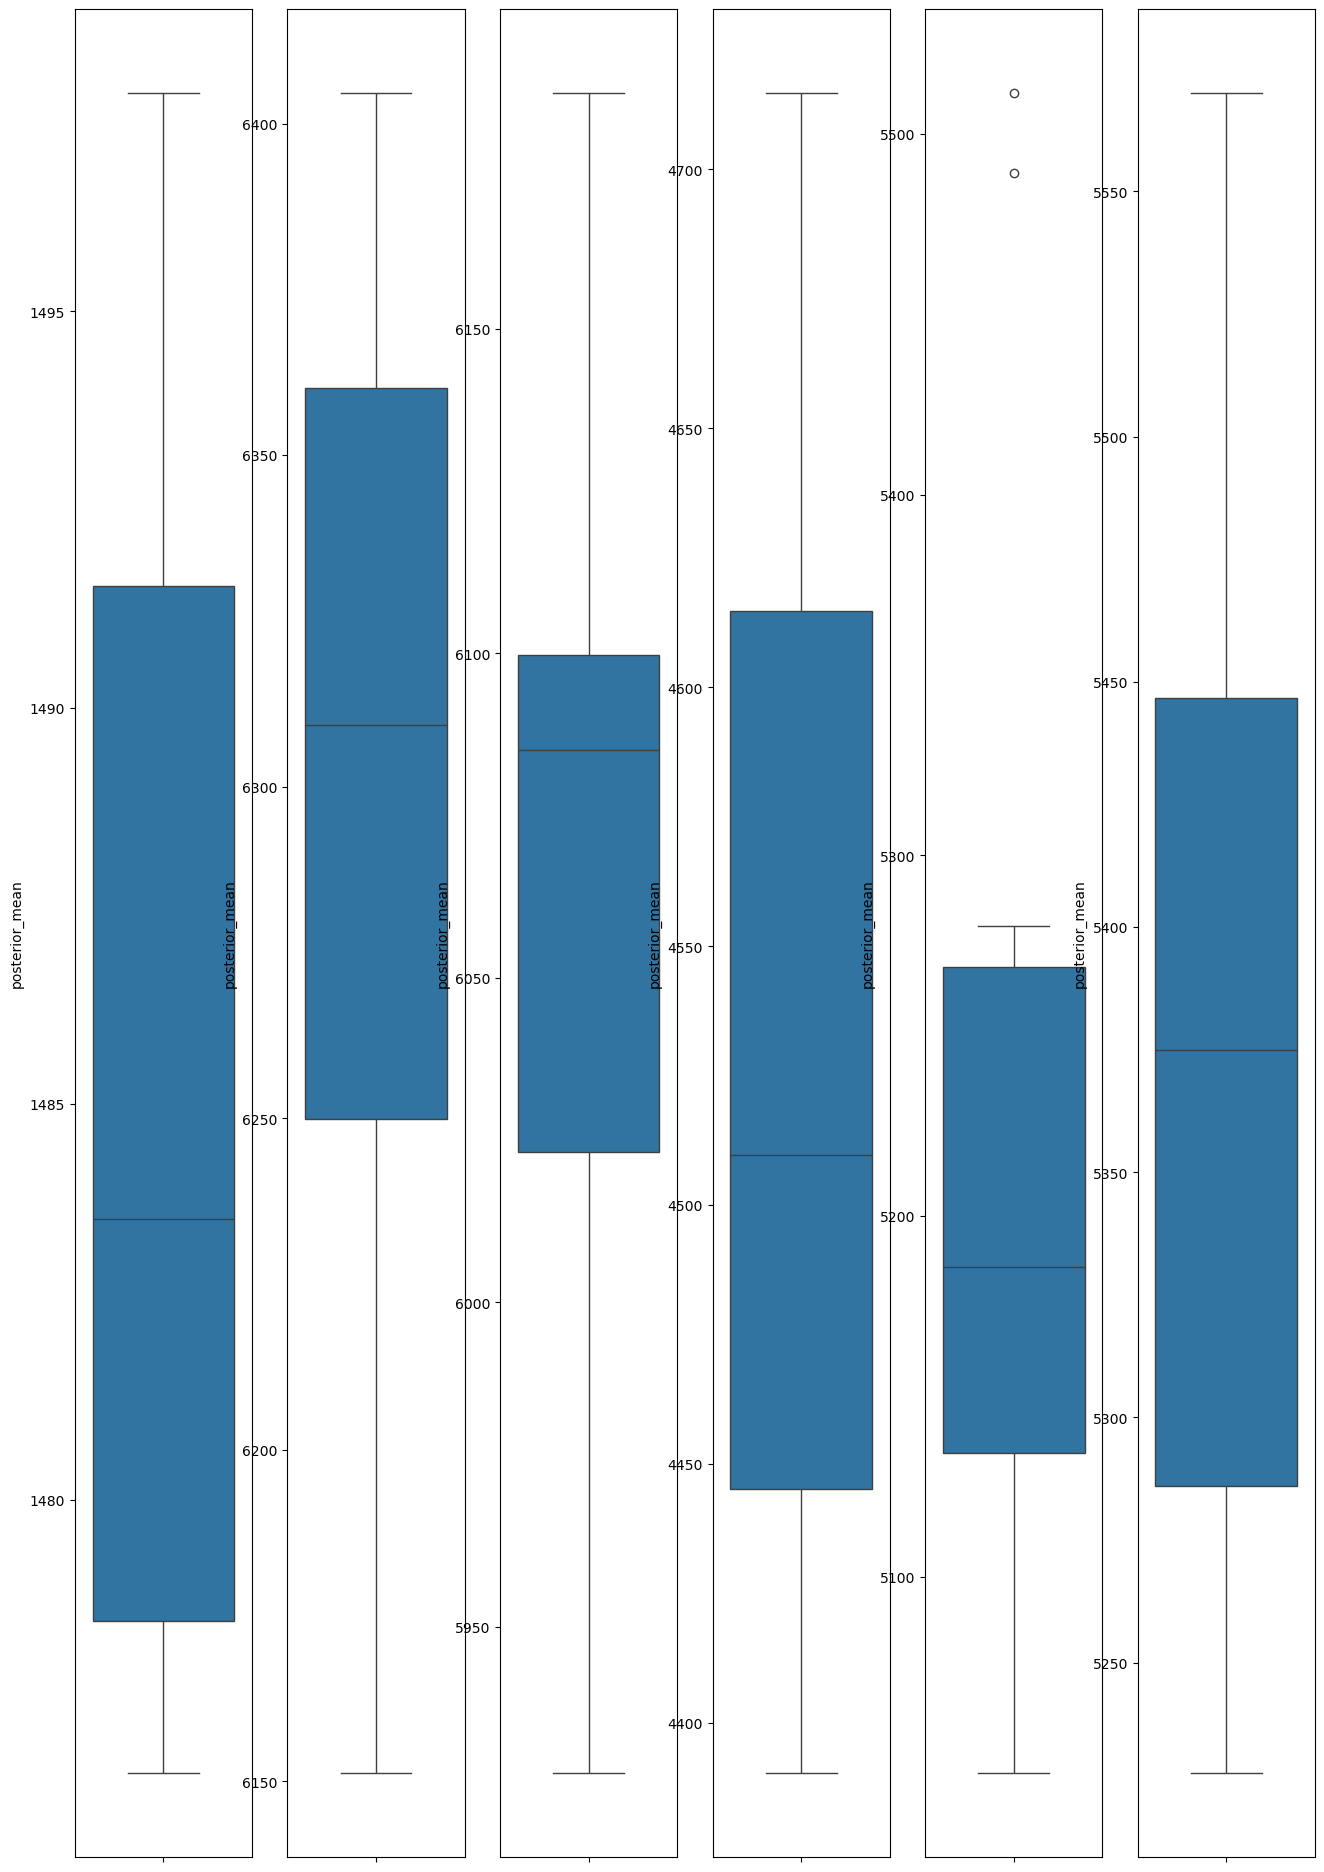

In [109]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16, 24)) 
for i in range(len(N_list)):
    sns.boxplot(out[(out['N']==N_list[i])]['posterior_mean'],ax = axes[i])

In [84]:
def expected_length(N,u,v):
    return (50*v + 2*u*(25 + N * v))/(100 + N*(u+v))
expected_length(10000,0.3,2000)


0.6049069894166405

In [82]:
def expected_length2(N,u,v):
    a = 100*N**2 * (v-u) * (25*(u+v)+u*v*N)
    b = (50+u*N)**2 * (50 + v*N)**2
    return a/b
expected_length2(30000,0.3,2000)

0.011017532993546759

In [139]:
def expected_number(N,u,v,m):
    a = 50*N**2 * (v-u)*(100+N*(u+v))
    b = (50+u*N)**2*(50 + v*N)**2
    return m*a/b
expected_number(2000,0.4,2000,200)

27.68165964968523

In [138]:
model_number = CmdStanModel(stan_file='one_popn_number_model.stan')

16:24:50 - cmdstanpy - INFO - compiling stan file /Users/qichen/Desktop/code/admix_stan/one_popn_dist/one_popn_number_model.stan to exe file /Users/qichen/Desktop/code/admix_stan/one_popn_dist/one_popn_number_model
16:25:13 - cmdstanpy - INFO - compiled model executable: /Users/qichen/Desktop/code/admix_stan/one_popn_dist/one_popn_number_model


In [157]:
n = 10
N_list = [500,1000,2000,3000,4000,5000]
columns = ['method','posterior_mean','lp__','N']
out = pd.DataFrame(columns=columns)
for i in range(len(N_list)):
    N = N_list[i]
    with open(f'one_popn_number_data/one_popn_number_{N}.json', 'r') as file:
        data = json.load(file)
    for k in range(n):
        pathfinder=model_number.pathfinder(data=data)
        fit = model_number.sample(data = data)
        out = pd.concat([out,pd.DataFrame({'method':['HMC'],'posterior_mean':[fit.summary()['Mean']['N']],'lp__':[fit.summary()['Mean']['lp__']],'N':[N*2]})],ignore_index = True)

        out = pd.concat([out,pd.DataFrame({'method':['pathfinder'],'posterior_mean':[pathfinder.draws()[:,2].mean()],'lp__':[pathfinder.draws()[:,1].mean()],'N':[N*2]})],ignore_index = True)
            

16:40:28 - cmdstanpy - INFO - Chain [1] start processing


16:40:29 - cmdstanpy - INFO - Chain [1] done processing
16:40:29 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:02 Iteration:  100 / 2000 [  5%]  (Warmup)





chain 1 |█▊        | 00:03 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:04 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:05 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:06 Iteration:  700 / 2000 [ 35%]  (Warmup)



chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:08 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:09 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |██████


16:40:44 - cmdstanpy - INFO - CmdStan done processing.
16:40:44 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Ra

16:40:45 - cmdstanpy - INFO - Chain [1] done processing
16:40:45 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:07 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   


16:40:59 - cmdstanpy - INFO - CmdStan done processing.
16:40:59 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Ra

16:41:01 - cmdstanpy - INFO - Chain [1] done processing
16:41:01 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:02 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:03 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:04 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:05 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:06 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:07 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:08 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:09 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊  


16:41:16 - cmdstanpy - INFO - CmdStan done processing.
16:41:16 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf

16:41:18 - cmdstanpy - INFO - Chain [1] done processing
16:41:18 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:02 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:04 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:06 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:07 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:08 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 


16:41:32 - cmdstanpy - INFO - CmdStan done processing.
16:41:32 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: 

16:41:34 - cmdstanpy - INFO - Chain [1] done processing
16:41:34 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:03 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 


16:41:49 - cmdstanpy - INFO - CmdStan done processing.
16:41:49 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: 

16:41:49 - cmdstanpy - INFO - Chain [1] start processing
16:41:50 - cmdstanpy - INFO - Chain [1] done processing
16:41:50 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status






chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:04 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:06 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:07 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:07 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:08 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:09 Iterat


16:42:07 - cmdstanpy - INFO - CmdStan done processing.
16:42:07 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Ra

16:42:08 - cmdstanpy - INFO - Chain [1] done processing
16:42:08 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:04 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:05 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:06 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:07 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:08 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:09 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▎   | 00:09 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   


16:42:23 - cmdstanpy - INFO - CmdStan done processing.
16:42:23 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: 

16:42:24 - cmdstanpy - INFO - Chain [1] done processing
16:42:25 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)




chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)




chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)




chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%] 


16:42:38 - cmdstanpy - INFO - CmdStan done processing.
16:42:38 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: 

16:42:39 - cmdstanpy - INFO - Chain [1] done processing
16:42:39 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)




chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)




chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)



chain 1 |██████▊  


16:42:53 - cmdstanpy - INFO - CmdStan done processing.
16:42:53 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf

16:42:54 - cmdstanpy - INFO - Chain [1] done processing
16:42:54 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 


16:43:07 - cmdstanpy - INFO - CmdStan done processing.
16:43:07 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: 

16:43:08 - cmdstanpy - INFO - Chain [1] done processing
16:43:08 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   |


16:43:22 - cmdstanpy - INFO - CmdStan done processing.
16:43:22 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Ran

16:43:23 - cmdstanpy - INFO - Chain [1] done processing
16:43:23 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)



chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊  


16:43:37 - cmdstanpy - INFO - CmdStan done processing.
16:43:37 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: R

16:43:38 - cmdstanpy - INFO - Chain [1] done processing
16:43:38 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊  


16:43:51 - cmdstanpy - INFO - CmdStan done processing.
16:43:51 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Rando

16:43:52 - cmdstanpy - INFO - Chain [1] done processing
16:43:52 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)




chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊  


16:44:05 - cmdstanpy - INFO - CmdStan done processing.
16:44:05 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Rando

16:44:06 - cmdstanpy - INFO - Chain [1] done processing
16:44:06 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:08 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████


16:44:19 - cmdstanpy - INFO - CmdStan done processing.
16:44:19 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: R

16:44:21 - cmdstanpy - INFO - Chain [1] done processing
16:44:21 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)




chain 1 |██████▊  


16:44:34 - cmdstanpy - INFO - CmdStan done processing.
16:44:34 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Rando

16:44:35 - cmdstanpy - INFO - Chain [1] done processing
16:44:35 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:03 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:06 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 


16:44:48 - cmdstanpy - INFO - CmdStan done processing.
16:44:48 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Rando

16:44:49 - cmdstanpy - INFO - Chain [1] done processing
16:44:49 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊


16:45:03 - cmdstanpy - INFO - CmdStan done processing.
16:45:03 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
Exception: gamma_lpdf: Rand

16:45:04 - cmdstanpy - INFO - Chain [1] done processing
16:45:04 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)




chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊  


16:45:17 - cmdstanpy - INFO - CmdStan done processing.
16:45:17 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Rando

16:45:18 - cmdstanpy - INFO - Chain [1] done processing
16:45:18 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊  


16:45:32 - cmdstanpy - INFO - CmdStan done processing.
16:45:32 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Rando

16:45:33 - cmdstanpy - INFO - Chain [1] done processing
16:45:33 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:03 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:06 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 


16:45:46 - cmdstanpy - INFO - CmdStan done processing.
16:45:46 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Ra

16:45:47 - cmdstanpy - INFO - Chain [1] done processing
16:45:47 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊  


16:46:01 - cmdstanpy - INFO - CmdStan done processing.
16:46:01 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: R

16:46:02 - cmdstanpy - INFO - Chain [1] done processing
16:46:02 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:03 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |█████▉    | 00:06 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 


16:46:15 - cmdstanpy - INFO - CmdStan done processing.
16:46:15 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Rando

16:46:17 - cmdstanpy - INFO - Chain [1] done processing
16:46:17 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:06 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   |


16:46:30 - cmdstanpy - INFO - CmdStan done processing.
16:46:30 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Rando

16:46:32 - cmdstanpy - INFO - Chain [1] done processing
16:46:32 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |██████▊   | 


16:46:45 - cmdstanpy - INFO - CmdStan done processing.
16:46:45 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Rando

16:46:46 - cmdstanpy - INFO - Chain [1] done processing
16:46:46 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:03 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:04 Iteration:  700 / 2000 [ 35%]  (Warmup)



chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)




chain 1 |██████▊  


16:47:00 - cmdstanpy - INFO - CmdStan done processing.
16:47:00 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Rando

16:47:01 - cmdstanpy - INFO - Chain [1] done processing
16:47:01 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:03 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:04 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:06 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 


16:47:14 - cmdstanpy - INFO - CmdStan done processing.
16:47:14 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Rando

16:47:15 - cmdstanpy - INFO - Chain [1] done processing
16:47:15 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:04 Iteration:  400 / 2000 [ 20%]  (Warmup)




chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   


16:47:28 - cmdstanpy - INFO - CmdStan done processing.
16:47:28 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Ra

16:47:30 - cmdstanpy - INFO - Chain [1] done processing
16:47:30 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 


16:47:42 - cmdstanpy - INFO - CmdStan done processing.
16:47:42 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Rando

16:47:44 - cmdstanpy - INFO - Chain [1] done processing
16:47:44 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)




chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   |


16:47:57 - cmdstanpy - INFO - CmdStan done processing.
16:47:57 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf

16:47:58 - cmdstanpy - INFO - Chain [1] done processing
16:47:58 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)




chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊  


16:48:12 - cmdstanpy - INFO - CmdStan done processing.
16:48:12 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Rando

16:48:13 - cmdstanpy - INFO - Chain [1] done processing
16:48:13 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:03 Iteration:  500 / 2000 [ 25%]  (Warmup)




chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:04 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |█████▉    | 00:06 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 


16:48:26 - cmdstanpy - INFO - CmdStan done processing.
16:48:26 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Rando

16:48:27 - cmdstanpy - INFO - Chain [1] done processing
16:48:27 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:06 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   


16:48:40 - cmdstanpy - INFO - CmdStan done processing.
16:48:40 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Ran

16:48:41 - cmdstanpy - INFO - Chain [1] done processing
16:48:41 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:03 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)





chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊  


16:48:55 - cmdstanpy - INFO - CmdStan done processing.
16:48:55 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf

16:48:55 - cmdstanpy - INFO - Chain [1] start processing
16:48:56 - cmdstanpy - INFO - Chain [1] done processing
16:48:56 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:06 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteratio


16:49:10 - cmdstanpy - INFO - CmdStan done processing.
16:49:10 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Rando

16:49:11 - cmdstanpy - INFO - Chain [1] done processing
16:49:11 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)




chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)




chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   |


16:49:24 - cmdstanpy - INFO - CmdStan done processing.
16:49:24 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Rando

16:49:25 - cmdstanpy - INFO - Chain [1] done processing
16:49:25 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)




chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)




chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:08 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████


16:49:38 - cmdstanpy - INFO - CmdStan done processing.
16:49:38 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf:

16:49:39 - cmdstanpy - INFO - Chain [1] start processing
16:49:40 - cmdstanpy - INFO - Chain [1] done processing
16:49:40 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)



chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)




chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iterat


16:49:53 - cmdstanpy - INFO - CmdStan done processing.
16:49:53 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Ran

16:49:54 - cmdstanpy - INFO - Chain [1] done processing
16:49:54 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████▊   


16:50:07 - cmdstanpy - INFO - CmdStan done processing.
16:50:07 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Rando

16:50:08 - cmdstanpy - INFO - Chain [1] done processing
16:50:08 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   |


16:50:22 - cmdstanpy - INFO - CmdStan done processing.
16:50:22 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: R

16:50:23 - cmdstanpy - INFO - Chain [1] done processing
16:50:23 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:04 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:06 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████     | 00:07 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:08 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊  


16:50:36 - cmdstanpy - INFO - CmdStan done processing.
16:50:36 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: R

16:50:37 - cmdstanpy - INFO - Chain [1] done processing
16:50:37 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:03 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:06 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████▊   | 0


16:50:51 - cmdstanpy - INFO - CmdStan done processing.
16:50:51 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: R

16:50:52 - cmdstanpy - INFO - Chain [1] done processing
16:50:52 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)



chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)




chain 1 |██████▊  


16:51:05 - cmdstanpy - INFO - CmdStan done processing.
16:51:05 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: R

16:51:06 - cmdstanpy - INFO - Chain [1] done processing
16:51:06 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)




chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)




chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   |


16:51:20 - cmdstanpy - INFO - CmdStan done processing.
16:51:20 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf:

16:51:21 - cmdstanpy - INFO - Chain [1] done processing
16:51:21 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:04 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:05 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)




chain 1 |████      | 00:06 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:07 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊  


16:51:35 - cmdstanpy - INFO - CmdStan done processing.
16:51:35 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: R

16:51:35 - cmdstanpy - INFO - Chain [1] done processing
16:51:36 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:04 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:06 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:07 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊  


16:51:49 - cmdstanpy - INFO - CmdStan done processing.
16:51:49 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: R

16:51:50 - cmdstanpy - INFO - Chain [1] done processing
16:51:50 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:07 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:08 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████


16:52:04 - cmdstanpy - INFO - CmdStan done processing.
16:52:04 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate 

16:52:05 - cmdstanpy - INFO - Chain [1] done processing
16:52:05 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)




chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 


16:52:19 - cmdstanpy - INFO - CmdStan done processing.
16:52:19 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Rando

16:52:20 - cmdstanpy - INFO - Chain [1] done processing
16:52:20 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:07 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   


16:52:34 - cmdstanpy - INFO - CmdStan done processing.
16:52:34 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Rando

16:52:35 - cmdstanpy - INFO - Chain [1] done processing
16:52:35 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status






chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:07 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████


16:52:48 - cmdstanpy - INFO - CmdStan done processing.
16:52:48 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate p

16:52:49 - cmdstanpy - INFO - Chain [1] done processing
16:52:49 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)




chain 1 |██████▊


16:53:03 - cmdstanpy - INFO - CmdStan done processing.
16:53:03 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: R

16:53:04 - cmdstanpy - INFO - Chain [1] done processing
16:53:04 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)



chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊  


16:53:17 - cmdstanpy - INFO - CmdStan done processing.
16:53:17 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Rand

16:53:18 - cmdstanpy - INFO - Chain [1] done processing
16:53:18 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |██▋       | 00:04 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:07 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 


16:53:32 - cmdstanpy - INFO - CmdStan done processing.
16:53:32 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: R

16:53:33 - cmdstanpy - INFO - Chain [1] done processing
16:53:33 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)




chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████▊   


16:53:46 - cmdstanpy - INFO - CmdStan done processing.
16:53:46 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: R

16:53:48 - cmdstanpy - INFO - Chain [1] done processing
16:53:48 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)




chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊  


16:54:01 - cmdstanpy - INFO - CmdStan done processing.
16:54:01 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random 

16:54:02 - cmdstanpy - INFO - Chain [1] done processing
16:54:02 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   


16:54:15 - cmdstanpy - INFO - CmdStan done processing.
16:54:15 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random vari

16:54:17 - cmdstanpy - INFO - Chain [1] done processing
16:54:17 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 


16:54:30 - cmdstanpy - INFO - CmdStan done processing.
16:54:30 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: R

16:54:31 - cmdstanpy - INFO - Chain [1] done processing
16:54:31 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   |


16:54:45 - cmdstanpy - INFO - CmdStan done processing.
16:54:45 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: R

16:54:46 - cmdstanpy - INFO - Chain [1] done processing
16:54:46 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:03 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:04 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:06 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 


16:54:59 - cmdstanpy - INFO - CmdStan done processing.
16:54:59 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: poisson_lpmf: Rate pa

16:55:00 - cmdstanpy - INFO - Chain [1] done processing
16:55:00 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:03 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:08 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊  


16:55:14 - cmdstanpy - INFO - CmdStan done processing.
16:55:14 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'one_popn_number_model.stan', line 26, column 8 to column 53)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'one_popn_number_model.stan', line 23, column 4 to column 28)
	Exception: gamma_lpdf: R

In [159]:
out[out['method']=='HMC']

,method,posterior_mean,lp__,N
0,HMC,750.44100,9085.920,1000
2,HMC,750.56100,9085.950,1000
4,HMC,751.05800,9085.950,1000
6,HMC,750.94600,9086.000,1000
8,HMC,750.67400,9085.950,1000
10,HMC,750.71300,9085.940,1000
12,HMC,750.87300,9085.940,1000
14,HMC,750.93700,9085.960,1000
16,HMC,750.30200,9085.960,1000
18,HMC,750.39800,9085.970,1000


In [196]:
model_number.optimize(data = data).stan_variable('N')

17:26:28 - cmdstanpy - INFO - Chain [1] start processing
17:26:28 - cmdstanpy - INFO - Chain [1] done processing
17:26:28 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.


4.94373

In [227]:
sum(data['y'][190:380])/190

1.1473684210526316

In [230]:
expected_number(8800,0.35,0.375,200)

1.1410431540688522

In [234]:
def sites(l,N,u,v):
    return 5000*N/(50+l*N)**3
sites(0.5,10000,0.6,2000)

0.0003882360591710578

In [239]:
import msprime
import numpy as np
import random
import json
import seaborn
import matplotlib.pyplot as plt
def all_ibd_segments(ts):
    n = ts.num_samples
    trees_iter = ts.trees()
    tree = next(trees_iter)
    last_mrca_m = np.zeros((n,n))
    for i in range(n):
        for j in range(i,n):
            last_mrca_m[i][j] = tree.mrca(i,j)
    last_left_m = np.zeros((n,n))
    segment_lengths_m = [[[]for x in range(n)]for y in range(n)]
    for tree in trees_iter:
        for i in range(n):
            for j in range(i,n):
                mrca = tree.mrca(i,j)
                last_mrca = last_mrca_m[i][j]
                if mrca!= last_mrca:
                    left = tree.interval[0]
                    last_left = last_left_m[i][j]
                    segment_lengths_m[i][j].append((left-last_left)/ts.sequence_length)
                    last_mrca_m[i][j] = mrca
                    last_left_m[i][j] = left
    for i in range(n):
        for j in range(i,n):
            segment_lengths_m[i][j].append((ts.sequence_length-last_left_m[i][j])/ts.sequence_length)
    return segment_lengths_m

def popn1_data(N,m,length,u):
    demography = msprime.Demography()
    demography.add_population(name="A", initial_size=N)
    bb = m*length
    kk = m*100
    ts = msprime.sim_ancestry(
        samples={"A": 10}, 
        demography=demography, 
        recombination_rate = 1/length,
        sequence_length = bb
    )
    all = all_ibd_segments(ts)
    out = {'N_obs':0,'y':[]}
    for j in range(20):
            for k in range(j+1,20):
                a = [l*kk for l in all[j][k] if u<l*kk]
                out['y'] += a
                out['N_obs'] += len(a)
    return out

def popn1_number(N,m,length,L):
    demography = msprime.Demography()
    demography.add_population(name="A", initial_size=N)
    bb = m*length
    kk = m*100
    ts = msprime.sim_ancestry(
        samples={"A": 10}, 
        demography=demography, 
        recombination_rate = 1/length,
        sequence_length = bb
    )
    all = all_ibd_segments(ts)
    out = {'N_obs':0,'y':[],'u':[],'v':[]}
    for i in range(len(L)-1):
        u = L[i]
        v = L[i+1]
        for j in range(20):
            for k in range(j+1,20):
                a = [l*kk for l in all[j][k] if u<l*kk<v]
                out['y'] += [len(a)]
                out['N_obs'] += 1
                out['u'] += [u]
                out['v'] += [v]
    return out

N_list = [3000,4000,5000]
columns = ['method','posterior_mean','lp__','N']
out = pd.DataFrame(columns=columns)
L = [0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5,0.525,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1,1.25,1.5,2,3,5,10,200]
for i in range(len(N_list)):
    N = N_list[i]
    for i in range(100):
        data = popn1_number(N,2,1e7,L)
        data['m'] = 200
        pathfinder=model_number.pathfinder(data=data)
        out = pd.concat([out,pd.DataFrame({'method':['pathfinder'],'posterior_mean':[pathfinder.draws()[:,2].mean()],'lp__':[pathfinder.draws()[:,1].mean()],'N':[N*2]})],ignore_index = True)
            


20:41:17 - cmdstanpy - INFO - Chain [1] start processing
20:41:18 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/x8/k3jsg9l14mg7njszvfns0ls00000gn/T/ipykernel_73078/2870177936.py:88: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  out = pd.concat([out,pd.DataFrame({'method':['pathfinder'],'posterior_mean':[pathfinder.draws()[:,2].mean()],'lp__':[pathfinder.draws()[:,1].mean()],'N':[N*2]})],ignore_index = True)
20:42:10 - cmdstanpy - INFO - Chain [1] start processing
20:42:11 - cmdstanpy - INFO - Chain [1] done processing
20:43:02 - cmdstanpy - INFO - Chain [1] start processing
20:43:03 - cmdstanpy - INFO - Chain [1] done processing
20:43:50 - cmdstanpy - INFO - Chain [1] start processing
20:43:51 - cmdstanpy - INFO - Chain [1] do

KeyboardInterrupt: 

In [240]:
out

,method,posterior_mean,lp__,N
0,pathfinder,8.218628,-9865.99000,6000
1,pathfinder,7.717336,-9493.11891,6000
2,pathfinder,8.282134,-9841.85027,6000
3,pathfinder,8.500086,-9988.90109,6000
4,pathfinder,8.623929,-10038.29270,6000
5,pathfinder,8.266312,-9915.66706,6000
6,pathfinder,8.300490,-9832.64775,6000
7,pathfinder,8.450706,-9882.54696,6000
8,pathfinder,8.551220,-9995.75238,6000
9,pathfinder,8.064937,-9735.08047,6000


In [241]:
def popn1_number_new(N,m,length):
    demography = msprime.Demography()
    demography.add_population(name="A", initial_size=N)
    bb = m*length
    kk = m*100
    ts = msprime.sim_ancestry(
        samples={"A": 100}, 
        demography=demography, 
        recombination_rate = 1/length,
        sequence_length = bb
    )
    all = all_ibd_segments(ts)
    out = {'N_obs':0,'y':[]}
    for i in range(200):
        for j in range(i+1,200):
            a = [l*kk for l in all[j][k] if 0.35<l*kk]
            out['N_obs'] += 1
            out['y'] += len(a)
    return out
model_debug = CmdStanModel(stan_file='debug_model.stan')

N_list = [3000,4000,5000]
columns = ['method','posterior_mean','lp__','N']
out = pd.DataFrame(columns=columns)
for i in range(len(N_list)):
    N = N_list[i]
    for i in range(100):
        data = popn1_number_new(N,2,1e7)
        pathfinder=model_number.pathfinder(data=data)

21:08:46 - cmdstanpy - INFO - compiling stan file /Users/qichen/Desktop/code/admix_stan/one_popn_dist/debug_model.stan to exe file /Users/qichen/Desktop/code/admix_stan/one_popn_dist/debug_model
21:09:15 - cmdstanpy - INFO - compiled model executable: /Users/qichen/Desktop/code/admix_stan/one_popn_dist/debug_model


TypeError: 'int' object is not iterable